## Terrain Maps
This document contains the code to compute the maps of the model domain for the final report.

### Importing

In [1]:
from functions.correlation_maps import MidpointNormalize
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
#Make sure we can also import Kaitlins code.
import sys
sys.path.append('/data/hpcdata/users/grejan/mitgcm/')
from mitgcm_python_master.grid import ERA5Grid, PACEGrid, Grid, dA_from_latlon, pierre_obs_grid

In [3]:
#Import Grid
gp='/data/oceans_output/shelf/kaight/mitgcm/PAS_grid/'
grid = Grid(gp)

/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:330: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hasattr(self, 'mode') and self.mode is 'w':
/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:705: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if typecode is not 'c':


#### Full Bathymetry

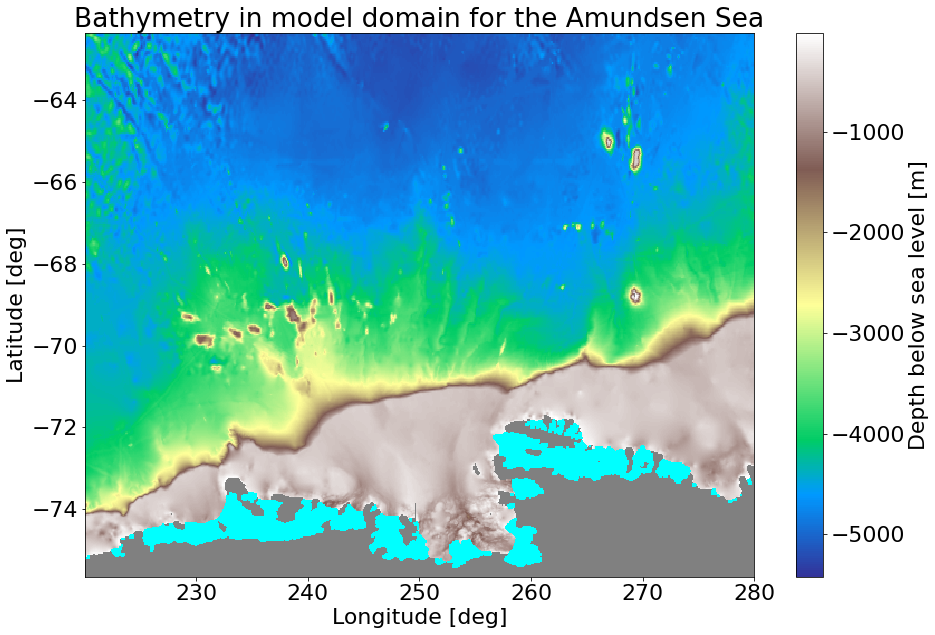

In [4]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))
m=np.sum(grid.lat_1d<=-60)
ax=plt.subplot(1,1,1)
bathy=grid.bathy
bathy[grid.land_mask]=np.nan
img=plt.pcolor(grid.lon_2d[:m,:]+360, grid.lat_2d[:m,:], bathy[:m,:], cmap='terrain')
plt.pcolor(grid.lon_2d[:m,:]+360, grid.lat_2d[:m,:], np.where(grid.ice_mask, np.ones(np.shape(grid.ice_mask)), np.nan*np.ones(np.shape(grid.ice_mask)))[:m,:], cmap='cool')
ax.set_facecolor('grey')
plt.colorbar(img, label='Depth below sea level [m]')
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
plt.title('Bathymetry in model domain for the Amundsen Sea')

plt.savefig('/data/hpcdata/users/grejan/mitgcm/03_output/bathymetry_full.png')

#### Zoomed in Bathymetry

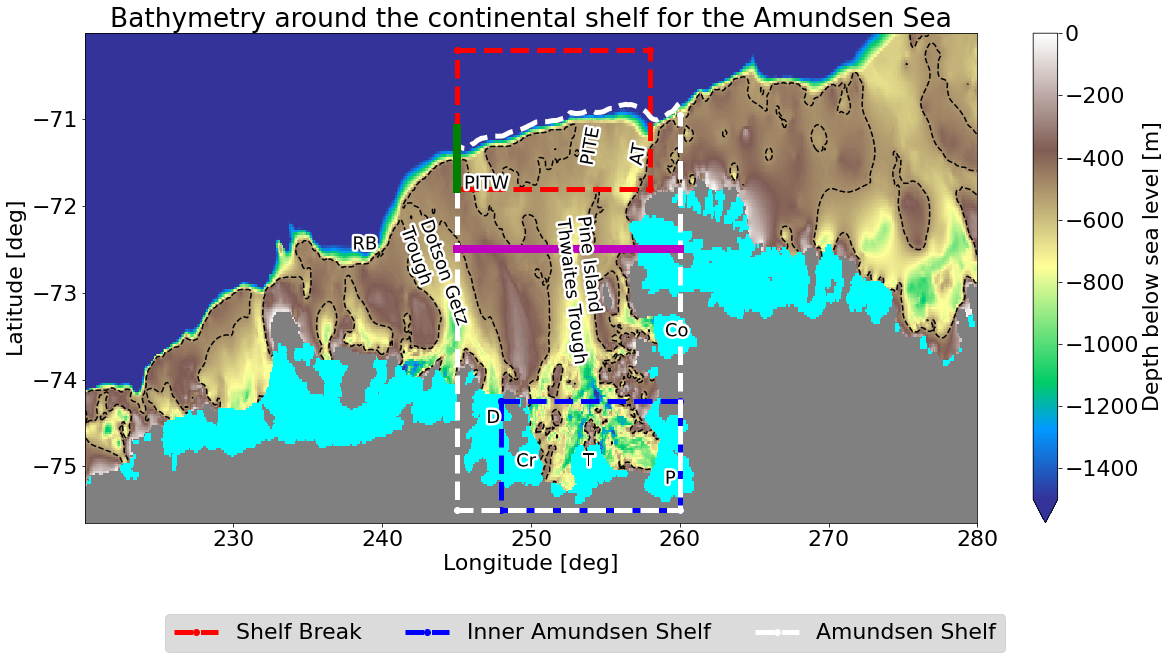

In [5]:
plt.rcParams.update({'font.size': 22})
fig=plt.figure(figsize=(20,10))
m=np.sum(grid.lat_1d<=-70)
ax=plt.subplot(1,1,1)
bathy=grid.bathy
bathy[grid.land_mask]=np.nan
img=plt.pcolor(grid.lon_2d[:m,:]+360, grid.lat_2d[:m,:], bathy[:m,:], cmap='terrain', vmax=0, vmin=-1500)
plt.pcolor(grid.lon_2d[:m,:]+360, grid.lat_2d[:m,:], np.where(grid.ice_mask, np.ones(np.shape(grid.ice_mask)), np.nan*np.ones(np.shape(grid.ice_mask)))[:m,:], cmap='cool')
ax.set_facecolor('grey')
plt.colorbar(img, label='Depth below sea level [m]', extend='min')
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
plt.title('Bathymetry around the continental shelf for the Amundsen Sea')

bathy[grid.ice_mask]=np.nan
bath=plt.contour(grid.lon_2d[:m,:]+360, grid.lat_2d[:m,:], bathy[:m,:], levels=[-500], colors=['black'])

#Write the names of geographical features.
fs=18
import matplotlib.patheffects as PathEffects
txt=plt.text(x=251.5, y=-73.8, s='Pine Island \nThwaites Trough', rotation=277, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=241, y=-73.5, s='Dotson Getz \nTrough', rotation=290, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=245.5, y=-71.8, s='PITW', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=253.2, y=-71.5, s='PITE', rotation=80, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=256.5, y=-71.5, s='AT', rotation=80, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=238, y=-72.5, s='RB', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

txt=plt.text(x=259, y=-75.2, s='P', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=253.5, y=-75.0, s='T', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=247, y=-74.5, s='D', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=249, y=-75, s='Cr', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=259, y=-73.5, s='Co', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

#PITE BOX
plt.plot([360-115, 360-102, 360-102, 360-115, 360-115], [-70.2, -70.2, -71.8, -71.8, -70.2], 'ro--' , lw=5, label='Shelf Break')

#INNER SHELF
plt.plot([360-112, 360-100, 360-100, 360-112, 360-112], [-74.25, -74.25, -75.5, -75.5, -74.25], 'bo--', lw=5, label='Inner Amundsen Shelf')

#FULL SHELF
plt.plot([360-115, 360-115, 360-100, 360-100], [-71.5, -75.5, -75.5, -70.95], 'wo--', lw=5, label='Amundsen Shelf')
m=np.sum(grid.lat_1d<=-70)
n=(grid.lon_1d>-115) & (grid.lon_1d<-100)
bath=plt.contour(grid.lon_2d[:m,n]+360, grid.lat_2d[:m,n], bathy[:m,n], levels=[-1750], colors=['w'], linewidths=[5])

#CROSS SECTION
plt.plot([360-115, 360-115], [-71.8, -71.1], 'go-', lw=8)
plt.plot([245,260], [-72.5, -72.5], 'mo-', lw=8)

fig.subplots_adjust(bottom=0.2)
frame=fig.legend(facecolor='lightgrey', loc='lower center', ncol=3)
plt.savefig('/data/hpcdata/users/grejan/mitgcm/03_output/bathymetry_shelf.png')

#### Illustrate Changes between New and Old Geometry

In [6]:
#First, we import shelf ice and bathymetry from both old (Naughten et al., 2022) and new runs
#New
shelfice=np.fromfile('/data/hpcdata/users/grejan/pahol_mitgcm/matlab/interp_PAS/data/shelfice_new_final_v3.bin',
                     dtype='>f8')
shelfice=shelfice.reshape((384,600))

bathy=np.fromfile('/data/hpcdata/users/grejan/pahol_mitgcm/matlab/interp_PAS/\
data/bathymetry_new_final_v3.bin',
                   dtype='>f8')
bathy=bathy.reshape((384,600))

#Old
shelfice_old=np.fromfile('/data/hpcdata/users/grejan/pahol_mitgcm/matlab/interp_PAS/data/shelfice_ARCHER.bin',
                     dtype='>f8')
shelfice_old=shelfice_old.reshape((384,600))

bathy_old=np.fromfile('/data/hpcdata/users/grejan/pahol_mitgcm/matlab/interp_PAS/data/bathymetry_bedmach_ARCHER.bin',
                   dtype='>f8')
bathy_old=bathy_old.reshape((384,600))

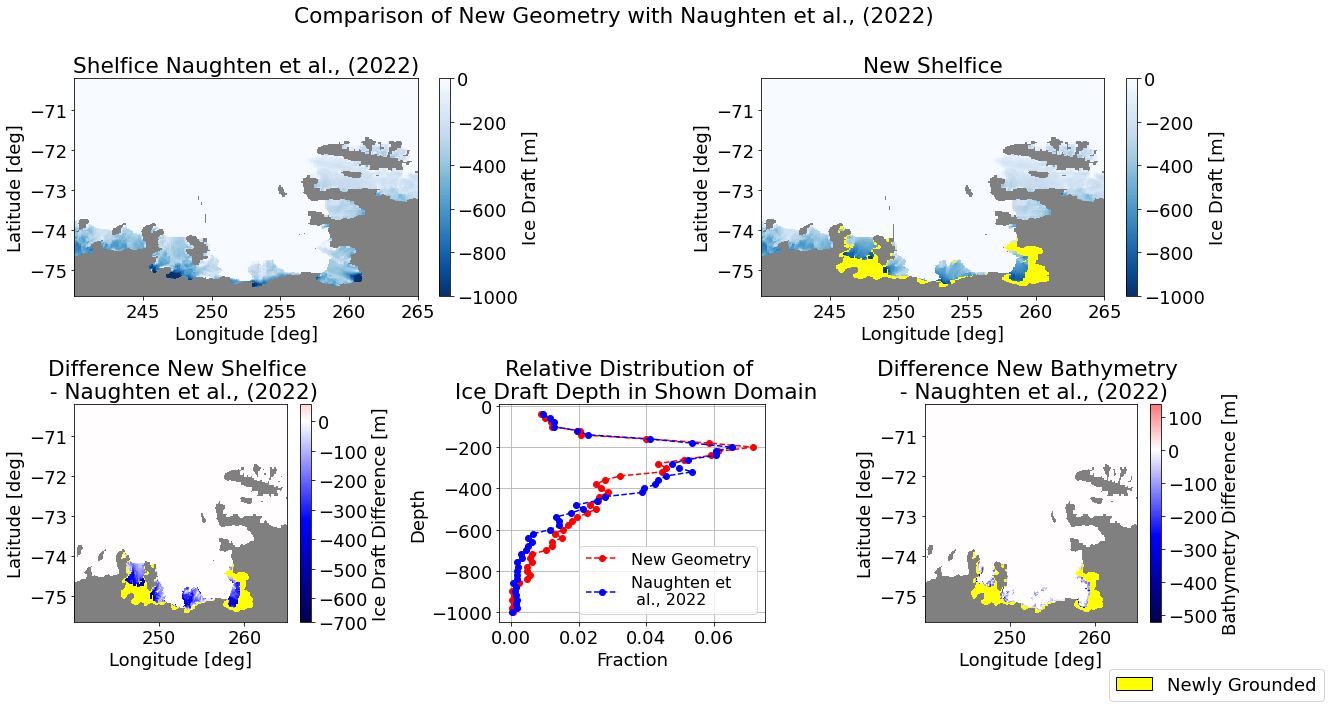

In [8]:
fig=plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18})

#Show old shelf ice
temp=shelfice_old.copy()
temp[grid.land_mask]=np.nan
ax=plt.subplot(2,2,1)
plt.title('Shelfice Naughten et al., (2022)')
plt.pcolor(grid.lon_2d[:187,200:450]+360, grid.lat_2d[:187,200:450], temp[:187,200:450], cmap='Blues_r', vmin=-1000, vmax=0)
ax.set_facecolor('grey')
plt.colorbar(label='Ice Draft [m]')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

#Show New shelfice
temp=shelfice.copy()
temp[grid.land_mask]=np.nan
grounded=((shelfice_old!=0) & (shelfice==0))
grounded=grounded[:187,200:450]
ax=plt.subplot(2,2,2)
plt.title('New Shelfice')
plt.pcolor(grid.lon_2d[:187,200:450]+360, grid.lat_2d[:187,200:450], np.where(grounded, np.ones(np.shape(grounded)), np.nan*np.ones(np.shape(grounded))), cmap='spring_r')
plt.pcolor(grid.lon_2d[:187,200:450]+360, grid.lat_2d[:187,200:450], np.where(grounded, np.nan*np.ones(np.shape(grounded)), temp[:187,200:450]), cmap='Blues_r', vmin=-1000, vmax=0)
plt.colorbar(label='Ice Draft [m]')
ax.set_facecolor('grey')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

import matplotlib.patches as mpatches
yellow_patch = mpatches.Patch(facecolor='yellow', edgecolor='black', label='Newly Grounded')

#Compute the differences
temp1=shelfice_old.copy()
temp2=shelfice.copy()
temp=temp2-temp1
temp[grid.land_mask]=np.nan
temp=temp[:187,200:450]

def newround(x, base=50):
    return base * round(x/base)

temp=np.where(grounded, np.nan*np.ones(np.shape(grounded)), temp)
divnorm = MidpointNormalize(vmin=np.nanmin(temp), vmax=np.nanmax(temp), midpoint=0)
ax=plt.subplot(2,3,4)
plt.title('Difference New Shelfice \n - Naughten et al., (2022)')
plt.pcolor(grid.lon_2d[:187,200:450]+360, grid.lat_2d[:187,200:450], np.where(grounded, np.ones(np.shape(grounded)), np.nan*np.ones(np.shape(grounded))), cmap='spring_r')
plt.pcolor(grid.lon_2d[:187,200:450]+360, grid.lat_2d[:187,200:450], np.where(grounded, np.nan*np.ones(np.shape(grounded)), temp), cmap='seismic', norm=divnorm)
ax.set_facecolor('grey')
plt.colorbar(label='Ice Draft Difference [m]', ticks=np.arange(newround(np.nanmin(temp)), newround(np.nanmax(temp)), 100))
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
ax.set_facecolor('grey')

temp1=bathy_old.copy()
temp2=bathy.copy()
temp=temp2-temp1
temp[grid.land_mask]=np.nan
temp=temp[:187,200:450]

def newround(x, base=50):
    return base * round(x/base)

temp=np.where(grounded, np.nan*np.ones(np.shape(grounded)), temp)
divnorm = MidpointNormalize(vmin=np.nanmin(temp), vmax=np.nanmax(temp), midpoint=0)

ax=plt.subplot(2,3,6)
plt.title('Difference New Bathymetry \n - Naughten et al., (2022)')
plt.pcolor(grid.lon_2d[:187,200:450]+360, grid.lat_2d[:187,200:450], np.where(grounded, np.ones(np.shape(grounded)), np.nan*np.ones(np.shape(grounded))), cmap='spring_r')
plt.pcolor(grid.lon_2d[:187,200:450]+360, grid.lat_2d[:187,200:450], np.where(grounded, np.nan*np.ones(np.shape(grounded)), temp), cmap='seismic', norm=divnorm)
ax.set_facecolor('grey')
plt.colorbar(label='Bathymetry Difference [m]', ticks=np.arange(newround(np.nanmin(temp)), newround(np.nanmax(temp)), 100))
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
ax.set_facecolor('grey')

ax=plt.subplot(2,3,5)
a=np.histogram(shelfice[:187,200:450].flatten(), bins=np.arange(-1000, 0, 20))
b=np.histogram(shelfice_old[:187,200:450].flatten(), bins=np.arange(-1000, 0, 20))
plt.plot(a[0]/np.sum(a[0]), a[1][:-1], 'r--o', label='New Geometry')
plt.plot(b[0]/np.sum(b[0]), b[1][:-1], 'b--o', label='Naughten et \n al., 2022')
plt.ylabel('Depth')
plt.xlabel('Fraction')
plt.legend(loc='lower right', fontsize=16)
plt.grid()
plt.title('Relative Distribution of \n Ice Draft Depth in Shown Domain')

fig.legend(handles=[yellow_patch], loc='lower right')
plt.subplots_adjust(hspace=0.5, wspace=0.6)
fig.suptitle('Comparison of New Geometry with Naughten et al., (2022)')

plt.savefig('/data/hpcdata/users/grejan/mitgcm/03_output/map_new_geometry.png')

#### Illustrate regions for climate indices

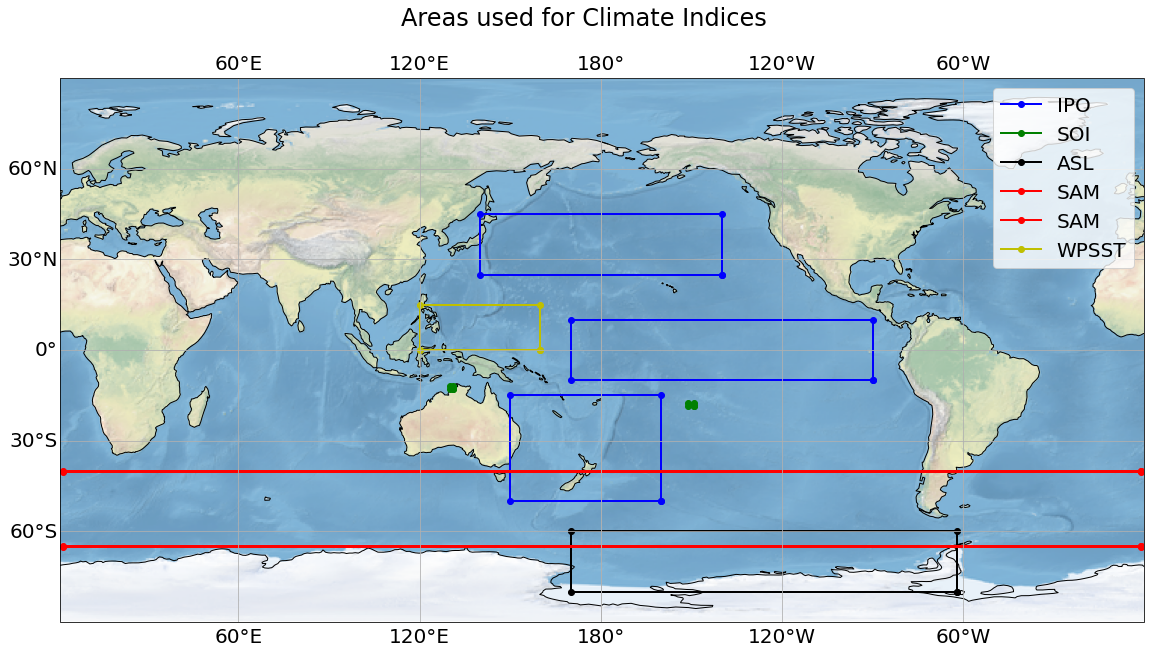

In [9]:
plt.rcParams.update({'font.size': 20})
fig=plt.figure(figsize=(20,10))
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude=180.0))
ax.stock_img()

#Function to draw rectangles in the domain.
def plot_region(lat, lon, c, label=False):
    if type(label)==str:
        plt.plot([lon[-1], lon[-1], lon[0], lon[0], lon[-1]], \
                 [lat[0], lat[-1], lat[-1], lat[0], lat[0]], '-o', c=c, label=label,\
                transform=ccrs.PlateCarree(), lw=2)
    else:
        plt.plot([lon[-1], lon[-1], lon[0], lon[0], lon[-1]], \
                 [lat[0], lat[-1], lat[-1], lat[0], lat[0]], '-o', c=c,\
                transform=ccrs.PlateCarree(), lw=2)
#IPO
plot_region(lon=[140, 360-140], lat=[25, 45], c='b')
plot_region(lon=[170, 360-90], lat=[-10, 10], c='b')
plot_region(lon=[150, 360-160], lat=[-50, -15], c='b', label='IPO')

#SOI
plot_region(lon=[360-151, 360-149], lat=[-18.5, -17.5], c='g')
plot_region(lon=[130, 131], lat=[-13, -12], c='g', label='SOI')

#ASL
plot_region(lon=[170, 298], lat=[-80, -60], c='k', label='ASL')

#SAM
plot_region(lon=[2,359], lat=[-65,-65.3], c='r', label='SAM')
plot_region(lon=[2,359], lat=[-40,-40.5], c='r', label='SAM')

#WPSST
plot_region(lon=[120,160], lat=[0,15], c='y', label='WPSST')


ax.coastlines()
fig.suptitle('Areas used for Climate Indices')
ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
    
ax.set_xlim([-179, 180])
ax.set_ylim([-90, 90])
ax.legend()

plt.savefig('/data/hpcdata/users/grejan/mitgcm/03_output/map_climate_indices.png')